# (Ford GoBike Dataset Exploration )
## by (Christine Magdy Ghobrial)

## Preliminary Wrangling

> DataSet Introduction :

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California.
Ford GoBike,consists of a fleet of specially designed,The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available in any time and riders have access to all bikes in the network when they become a member or purchase a pass.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('C:/Users/LENOVO/Downloads/201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# change the data type for start and end time to be datetime64 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [11]:
print(df.head(2))

   duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   

                 end_station_name  end_station_latitude  \
0  Commercial St at Montgomery St             37.794231   
1              Berry St at 4th St             37.775880   

   end_station_longitude  bike_id user_type  member_birth_year member_gender  \
0            -122.402923     4902  Customer             1984.0          Male   
1            -122.393170     

In [12]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
# dt.strftime() function to convert the dates in the given series object to the specified date format
# Directive %a -->> is Meaning Weekday as locale’s abbreviated name..

df['start_time_weekday'] = df['start_time'].dt.strftime('%a')

In [6]:
# Start and end time in hours -->> dt. hour attribute return a numpy array containing the hour .
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thu,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,23,0


### What is the structure of your dataset?

> this dataset have a tow major points the first one about trip info and the second point is about the member info
the trip info consist of : (trip timing --->> start and end 
                             stations -->> station name -->> latitude and longitude -->> start and end 
the member info consist of : ( the user type -->> subscriber or customer 
                               the  user birth_year -->> user age               
                               the user gender-->> male or female or other 
 that are the maily varibles were exist in Ford GoBike dataset                               
                               

### What is/are the main feature(s) of interest in your dataset?

>i am interested in the effect of user age , user type and  user gender about the trip duration .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the trip duration will have a strong indication for each variable .

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

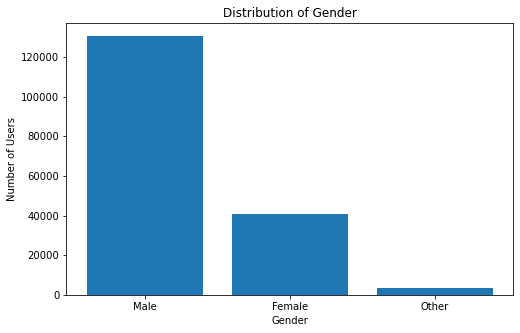

In [12]:
# genders (categorical) -->> ordinal variable's distribution
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

the number of male bikers greater than the female bikers

Text(0.5, 1.0, 'The Distrbution of User Types')

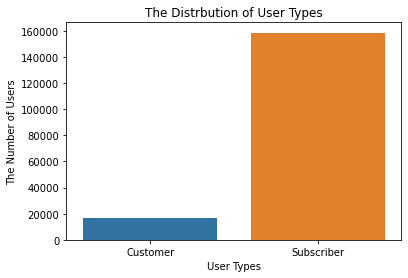

In [29]:
# user_type (categorical) -->> ordinal variable's distribution
sb.countplot(data=df, x='user_type');
plt.xlabel('User Types');
plt.ylabel('The Number of Users');
plt.title('The Distrbution of User Types')

'Subscriber' user are more than 'Customer' user.

In [7]:
# to convert seconds to minutes 
df['duration_minute'] = df['duration_sec']/60
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_hour,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,17,8,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thu,18,6,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,12,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,17,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,23,0,26.416667


Text(0.5, 1.0, 'The Distribution of trips durations')

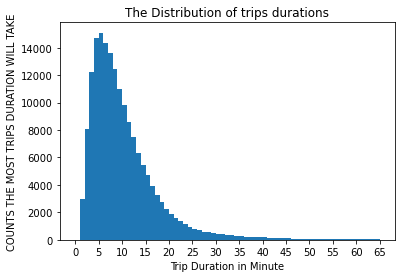

In [35]:
# duration ( quantitative)
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('COUNTS THE MOST TRIPS DURATION WILL TAKE')
plt.title('The Distribution of trips durations')



the most trips was very short  time it was in range 5 to 10 minutes and also though there were some very long trips

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [8]:
# we will calculate riders age from 'member_birth_year'

df['member_age'] = 2020 - df['member_birth_year']


In [9]:
# that query help to select the attribute without null values 
df = df.query('member_age <= 170')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_hour,duration_minute,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thu,17,8,869.750000,36.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thu,12,5,1030.900000,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thu,17,4,608.166667,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thu,23,0,26.416667,46.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,Thu,23,0,29.883333,61.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,Thu,23,0,19.116667,37.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989.0,Male,No,Thu,23,0,26.916667,31.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988.0,Other,No,Thu,23,0,26.166667,32.0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992.0,Male,No,Thu,23,0,17.483333,28.0
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5318,Subscriber,1996.0,Female,Yes,Thu,23,0,7.633333,24.0


In [10]:
#casting member_birth_year ,member_age  attributes from float to int 
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_hour,duration_minute,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,Thu,17,8,869.750000,36
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,Thu,12,5,1030.900000,48
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,Thu,17,4,608.166667,31
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Thu,23,0,26.416667,46
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Thu,23,0,29.883333,61
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,Thu,23,0,19.116667,37
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,Thu,23,0,26.916667,31
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,Thu,23,0,26.166667,32
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992,Male,No,Thu,23,0,17.483333,28
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5318,Subscriber,1996,Female,Yes,Thu,23,0,7.633333,24


Text(0.5, 1.0, 'The Distribution of users age')

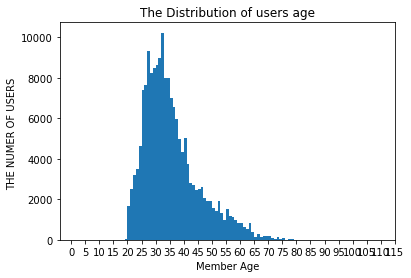

In [31]:
# Age distributhion ( quantitative)
bins = np.arange(0, 80, 1)
ticks = np.arange(0, 120, 5)
plt.hist(data=df, x='member_age', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Member Age');
plt.ylabel('THE NUMER OF USERS ')
plt.title('The Distribution of users age')



Most members were around 25 to 40 years old

Text(0.5, 1.05, 'The Distribution of the trips start time by hours')

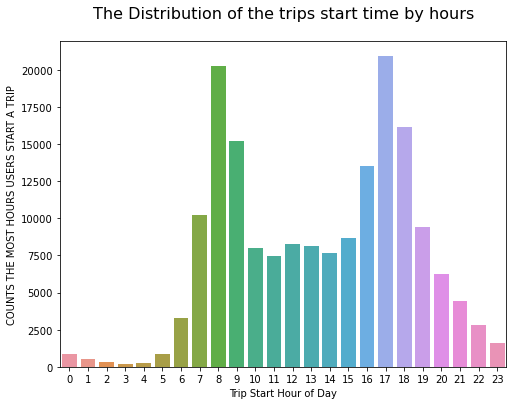

In [45]:
# trip distribution through start time of hours

plt.rcParams['figure.figsize'] = 8, 6
sb.countplot(data=df, x='start_time_hour');
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('COUNTS THE MOST HOURS USERS START A TRIP');
plt.title('The Distribution of the trips start time by hours' , y=1.05, fontsize=16)



the most hours of trip starting in that rang (7:00 ,8:00, 9:00 Am )and (4:00 , 5:00 ,6:00 Pm) 

Text(0.5, 1.05, 'The Distribution of the trips end time by hours')

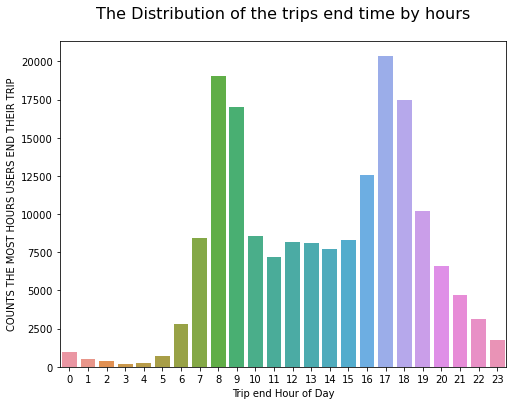

In [44]:
# trip distribution through end time of hours (quantitative)

plt.rcParams['figure.figsize'] = 8, 6 ;
sb.countplot(data=df, x='end_time_hour');
plt.xlabel('Trip end Hour of Day');
plt.ylabel('COUNTS THE MOST HOURS USERS END THEIR TRIP');
plt.title('The Distribution of the trips end time by hours' , y=1.05, fontsize=16)



In this plot it is seems like the Trip-start-hour plot, that is not right but there is a small differenc beouse the most trips was very short time it was in rnge 5 to 10 minutes

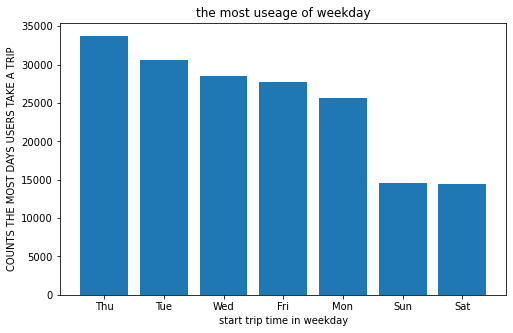

In [40]:
# genders (categorical) -->> ordinal variable's distribution
plt.figure(figsize=[8,5])
plt.bar(x = df.start_time_weekday.value_counts().keys(), height = df.start_time_weekday.value_counts() )
plt.title('the most useage of weekday')
plt.xlabel('start trip time in weekday')
plt.ylabel('COUNTS THE MOST DAYS USERS TAKE A TRIP')
plt.show()

the most days of trip (thursday , tuesday , wednesday , friday, monday ) and the least days are  (sunday , saturday)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the number of male bikers greater than the female bikers
> 'Subscriber' user are more than 'Customer' user.
> the most trips was very short  time it was in range 5 to 10 minutes and also though there were some very long trips
> the most hours of trip starting in that rang (7:00 ,8:00, 9:00 Am )and (4:00 , 5:00 ,6:00 Pm) 
>No transformation was needed thorough cleaning dtaset
> the most days of trip (thursday , tuesday , wednesday , friday, monday ) and the least days are  (sunday , saturday).
> the Most members were around 25 to 40 years old

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I generated new fields such as start-time-hour , end-time-hour , start-time-weekday , member_age , duration_minute that was give me a more clare for the trips of customers and subscribers , change the data type (casting) for start and end time to be datetime64 it is help me to assessment the most dayes and hours  start and end trip and member-birth_year from float tto integer  .convert seconds to minutes to more clarify the duration of all trip on minutes

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [62]:
numeric_vars = ['duration_minute', 'member_age']
categoric_vars = ['member_gender', 'start_time_hour', 'start_time_weekday', 'user_type']


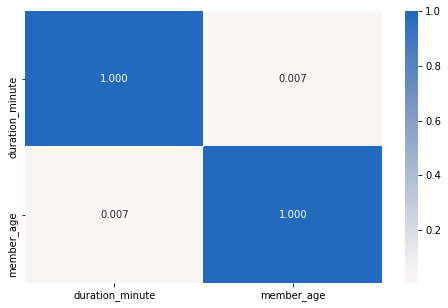

In [63]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

the correlation coefficient between duration_minute and member_age is very low .we can see this from a relatively low correlation score of 0.007

Text(0.5, 1.0, 'USERS TYPES AND THEIR TRIPS DURATION')

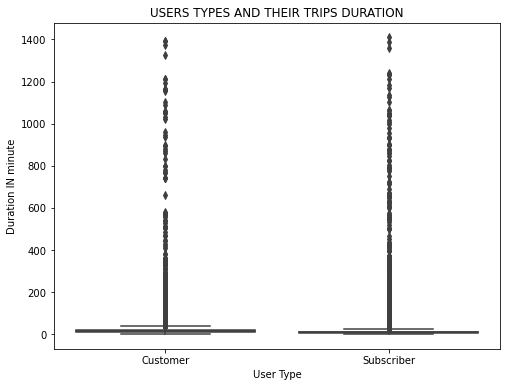

In [46]:
sb.boxplot(data=df, x='user_type', y='duration_minute');
plt.xlabel('User Type');
plt.ylabel('Duration IN minute');
plt.title ('USERS TYPES AND THEIR TRIPS DURATION')

trip duration of customers are greater than the subscribers but it`s not a big difference  

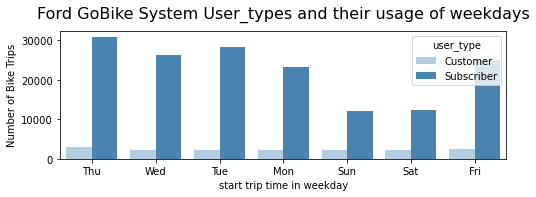

In [50]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_time_weekday', hue = 'user_type', palette = 'Blues')
plt.xlabel('start trip time in weekday')
plt.ylabel('Number of Bike Trips')
plt.title("Ford GoBike System User_types and their usage of weekdays", y=1.05, fontsize=16)
plt.show()

Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm. Customers are usually use the system mainly on weekends to explore the Bay Area

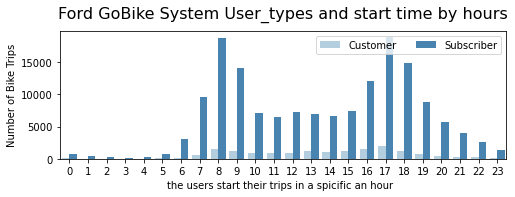

In [49]:
# subplot 2
plt.figure(figsize = [8, 8])
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
plt.title("Ford GoBike System User_types and start time by hours", y=1.05, fontsize=16)
plt.xlabel('the users start their trips in a spicific an hour  ')
plt.ylabel('Number of Bike Trips')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.show()

Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm.

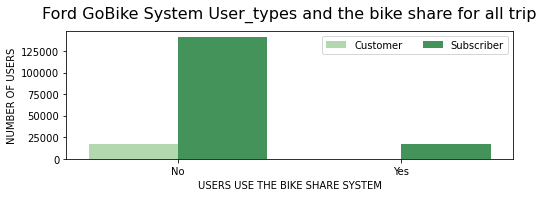

In [52]:
# subplot 3
plt.figure(figsize = [8, 8])
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Greens')
plt.title("Ford GoBike System User_types and the bike share for all trip", y=1.05, fontsize=16)
plt.xlabel('USERS USE THE BIKE SHARE SYSTEM')
plt.ylabel('NUMBER OF USERS')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

There was a lot of subscribers using the bike sharing system than casual customers overall

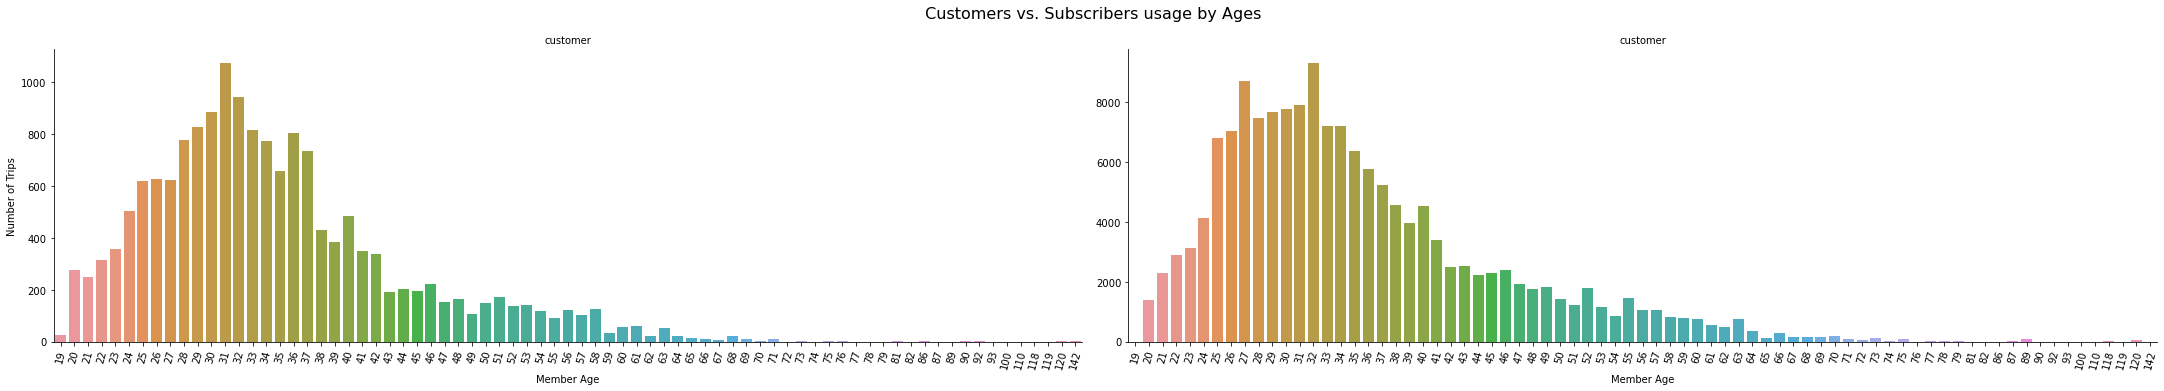

In [17]:
# # Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = df, x = 'member_age', col='user_type', kind='count', sharey = False, height=5, aspect=3)

graph.set_axis_labels('Member Age', 'Number of Trips')
graph.set_titles('customer' , 'Subscriber')

graph.fig.suptitle(' Customers vs. Subscribers usage by Ages', y=1.05, fontsize=16);
graph.set_xticklabels(rotation=75);



 Both user type show the high number of 31 year olds falling withing both catgoires. Subscribers have a wider range of ages while Customers tends to have mostly younger users . while the Subscriber user group is more spread out between varying ages 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days.most trips were on work days (Mon-Fri).trip duration of customers are greater than the subscribers but it is not a big difference.in the middle age they take longer trip time

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> trip duration of customers are greater than the subscribers but it is not a big difference

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1.05, 'Ford GoBike System User_types and the bike share for all trip')

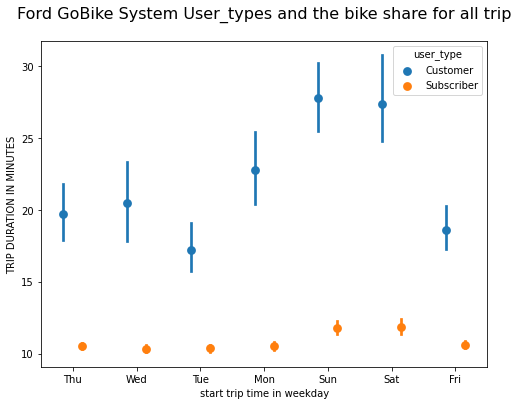

In [54]:

sb.pointplot(data = df, x = 'start_time_weekday', y = 'duration_minute', hue = 'user_type', dodge=0.3, linestyles="" );
plt.xlabel('START TRIP time_weekday');
plt.ylabel('duration_minute');
plt.xlabel('start trip time in weekday')
plt.ylabel('TRIP DURATION IN MINUTES')
plt.title("Ford GoBike System User_types and the bike share for all trip", y=1.05, fontsize=16)


It can be seen from the above plot that subscribers ride much shorter trips compared to customers on each day of the week.

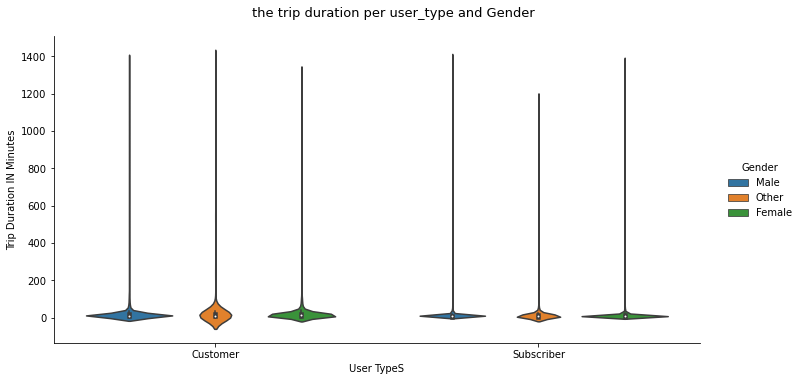

In [53]:


graph = sb.catplot(data=df, x='user_type', y="duration_minute", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User TypeS", "Trip Duration IN Minutes")
graph._legend.set_title('Gender')
graph.fig.suptitle('the trip duration per user_type and Gender', y=1.05, fontsize=13);


In both cases, females take longer trips than males and other genders. The difference is the customers greater than the subscribers (the difference is quite small).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>the relationship between the multiple variables plotted are visualized altogether and information are presented combined. 
>  subscribers ride much shorter trips compared to customers on each day of the week.
>females take longer trips than males and other genders. The difference is the customers greater than the subscribers (the difference is quite small).



### Were there any interesting or surprising interactions between features?

> females take longer trips than males

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

#### Sources

https://www.fordgobike.com/
https://seaborn.pydata.org/generated/seaborn.catplot.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xticks.html